In [24]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

# Load the datasets
train_df = pd.read_csv('train_E6oV3lV.csv')
test_df = pd.read_csv('test_tweets_anuFYb8.csv')

# Function to clean the text without using NLTK
def clean_text_simple(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean the tweets in the training and test datasets
train_df['cleaned_tweet'] = train_df['tweet'].apply(clean_text_simple)
test_df['cleaned_tweet'] = test_df['tweet'].apply(clean_text_simple)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['cleaned_tweet'])
X_test = vectorizer.transform(test_df['cleaned_tweet'])

# Target variable
y_train = train_df['label']


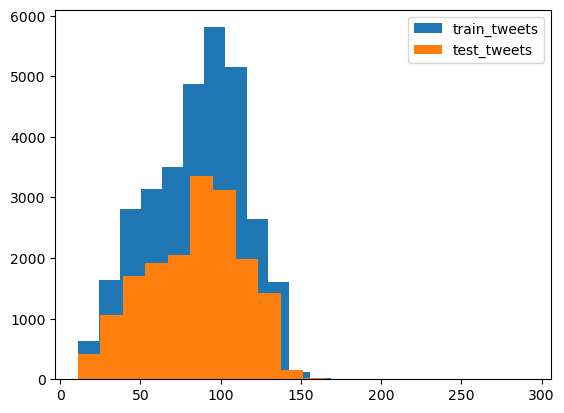

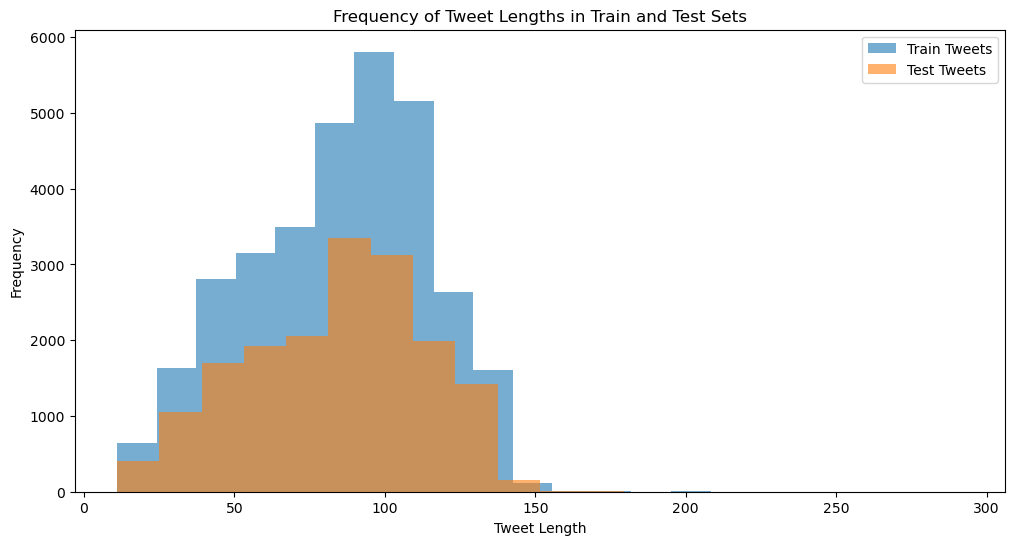

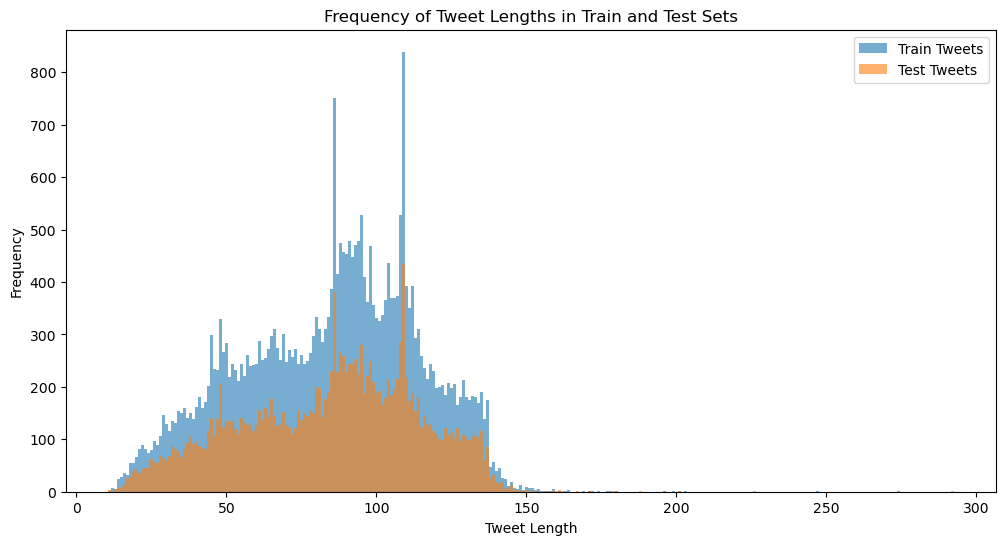

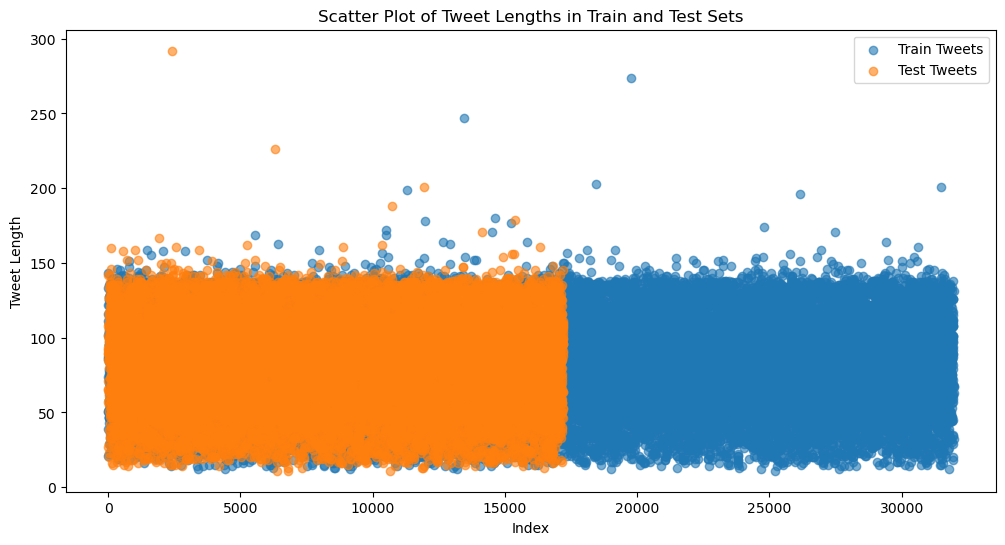

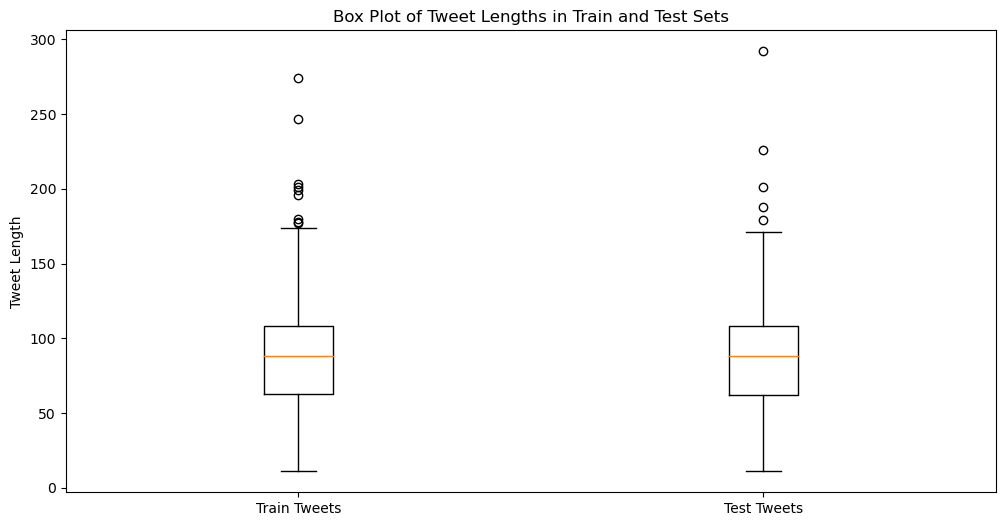

<Figure size 1200x600 with 0 Axes>

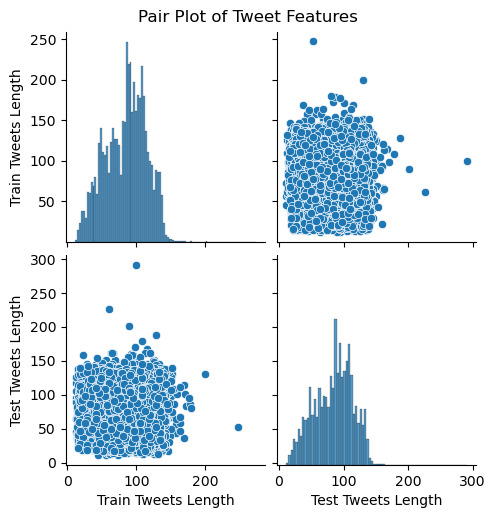

In [25]:
# Calculate tweet lengths
length_train = train_df['tweet'].str.len()
length_test = test_df['tweet'].str.len()

# Histogram of tweet lengths
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(length_train, bins=20, alpha=0.6, label="Train Tweets")
plt.hist(length_test, bins=20, alpha=0.6, label="Test Tweets")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Frequency of Tweet Lengths in Train and Test Sets')
plt.legend()
plt.show()

# Bar plot of tweet lengths
length_train_counts = length_train.value_counts().sort_index()
length_test_counts = length_test.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(length_train_counts.index, length_train_counts.values, alpha=0.6, label="Train Tweets")
plt.bar(length_test_counts.index, length_test_counts.values, alpha=0.6, label="Test Tweets")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Frequency of Tweet Lengths in Train and Test Sets')
plt.legend()
plt.show()

# Scatter plot of tweet lengths
plt.figure(figsize=(12, 6))
plt.scatter(range(len(length_train)), length_train, alpha=0.6, label="Train Tweets")
plt.scatter(range(len(length_test)), length_test, alpha=0.6, label="Test Tweets")
plt.xlabel('Index')
plt.ylabel('Tweet Length')
plt.title('Scatter Plot of Tweet Lengths in Train and Test Sets')
plt.legend()
plt.show()

# Box plot of tweet lengths
data = {
    'Train Tweets': length_train,
    'Test Tweets': length_test
}
plt.figure(figsize=(12, 6))
plt.boxplot(data.values(), labels=data.keys())
plt.ylabel('Tweet Length')
plt.title('Box Plot of Tweet Lengths in Train and Test Sets')
plt.show()

# Pair plot of tweet lengths
data = {
    'Train Tweets Length': length_train,
    'Test Tweets Length': length_test,    
}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.pairplot(df)
plt.suptitle('Pair Plot of Tweet Features', y=1.02)
plt.show()


In [26]:
# SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions with SVM
svm_train_preds = svm_model.predict(X_train)

# Evaluation metrics for SVM
svm_accuracy = accuracy_score(y_train, svm_train_preds)
svm_precision = precision_score(y_train, svm_train_preds, average='weighted')
svm_recall = recall_score(y_train, svm_train_preds, average='weighted')
svm_f1 = f1_score(y_train, svm_train_preds, average='weighted')

# Display results for SVM
print('SVM:')
print(f'Accuracy: {svm_accuracy}')
print(f'Precision: {svm_precision}')
print(f'Recall: {svm_recall}')
print(f'F1 Score: {svm_f1}')
print(f'Classification Report:\n{classification_report(y_train, svm_train_preds)}')

SVM:
Accuracy: 0.9834178086477692
Precision: 0.9836530225122395
Recall: 0.9834178086477692
F1 Score: 0.9824020816284046
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29720
           1       1.00      0.77      0.87      2242

    accuracy                           0.98     31962
   macro avg       0.99      0.88      0.93     31962
weighted avg       0.98      0.98      0.98     31962



In [27]:
# Predictions on the test set
svm_test_preds = svm_model.predict(X_test)

# Add predictions to the test DataFrame
test_df['svm_predicted_label'] = svm_test_preds

# Display the first few predictions
print(test_df[['id', 'tweet', 'cleaned_tweet', 'svm_predicted_label']].head())


      id                                              tweet  \
0  31963  #studiolife #aislife #requires #passion #dedic...   
1  31964   @user #white #supremacists want everyone to s...   
2  31965  safe ways to heal your #acne!!    #altwaystohe...   
3  31966  is the hp and the cursed child book up for res...   
4  31967    3rd #bihday to my amazing, hilarious #nephew...   

                                       cleaned_tweet  svm_predicted_label  
0  studiolife aislife requires passion dedication...                    0  
1    white supremacists want everyone to see the ...                    0  
2  safe ways to heal your acne    altwaystoheal h...                    0  
3  is the hp and the cursed child book up for res...                    0  
4    rd bihday to my amazing hilarious nephew eli...                    0  


In [28]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions with Random Forest
rf_train_preds = rf_model.predict(X_train)

# Evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_train, rf_train_preds)
rf_precision = precision_score(y_train, rf_train_preds, average='weighted')
rf_recall = recall_score(y_train, rf_train_preds, average='weighted')
rf_f1 = f1_score(y_train, rf_train_preds, average='weighted')

# Display results for Random Forest
print('Random Forest:')
print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'F1 Score: {rf_f1}')
print(f'Classification Report:\n{classification_report(y_train, rf_train_preds)}')

Random Forest:
Accuracy: 0.999718415618547
Precision: 0.9997185008639112
Recall: 0.999718415618547
F1 Score: 0.999718153775636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29720
           1       1.00      1.00      1.00      2242

    accuracy                           1.00     31962
   macro avg       1.00      1.00      1.00     31962
weighted avg       1.00      1.00      1.00     31962



In [29]:
# Predictions on the test set
rf_test_preds = rf_model.predict(X_test)

# Add predictions to the test DataFrame
test_df['rf_predicted_label'] = rf_test_preds

# Display the first few predictions
print(test_df[['id', 'tweet', 'cleaned_tweet', 'rf_predicted_label']].head())


      id                                              tweet  \
0  31963  #studiolife #aislife #requires #passion #dedic...   
1  31964   @user #white #supremacists want everyone to s...   
2  31965  safe ways to heal your #acne!!    #altwaystohe...   
3  31966  is the hp and the cursed child book up for res...   
4  31967    3rd #bihday to my amazing, hilarious #nephew...   

                                       cleaned_tweet  rf_predicted_label  
0  studiolife aislife requires passion dedication...                   0  
1    white supremacists want everyone to see the ...                   0  
2  safe ways to heal your acne    altwaystoheal h...                   0  
3  is the hp and the cursed child book up for res...                   0  
4    rd bihday to my amazing hilarious nephew eli...                   0  


In [30]:
# Target variable
y_train = train_df['label']

# Train SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions on the test set using both models
svm_test_preds = svm_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)

# Convert numerical predictions to positive and negative labels
svm_final_labels = ['positive' if pred == 1 else 'negative' for pred in svm_test_preds]
rf_final_labels = ['positive' if pred == 1 else 'negative' for pred in rf_test_preds]

# Add predictions to the test DataFrame
test_df['svm_predicted_sentiment'] = svm_final_labels
test_df['rf_predicted_sentiment'] = rf_final_labels

# Display the first few predictions
print(test_df[['tweet', 'svm_predicted_sentiment', 'rf_predicted_sentiment']].head())

# Save the predictions to a CSV file
test_df[['tweet', 'svm_predicted_sentiment', 'rf_predicted_sentiment']].to_csv('test_predictions.csv', index=False)

                                               tweet svm_predicted_sentiment  \
0  #studiolife #aislife #requires #passion #dedic...                negative   
1   @user #white #supremacists want everyone to s...                negative   
2  safe ways to heal your #acne!!    #altwaystohe...                negative   
3  is the hp and the cursed child book up for res...                negative   
4    3rd #bihday to my amazing, hilarious #nephew...                negative   

  rf_predicted_sentiment  
0               negative  
1               negative  
2               negative  
3               negative  
4               negative  
